# Домашняя работа №1

In [1]:
import numpy as np

In [2]:
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [17]:
x = np.array([1, 1])
y = np.array([2, 0])
z = np.array([0, 2])

In [18]:
a = x + 2*y + 3*z
a

array([5, 7])

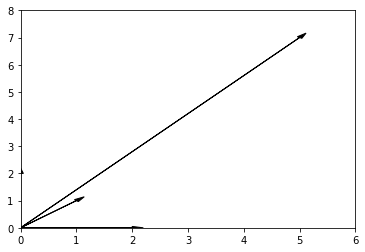

In [20]:
ax = plt.axes()

plt.xlim( [0, 6] )
plt.ylim( [0, 8] )

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )

ax.arrow( 0, 0, a[0], a[1], head_width=0.1, head_length=0.2, fc='k', ec='k' ) 

plt.show()

In [9]:
# Угол между xy (по графику очевидно 45 градусов, но посчитаем по формулам)
def cosine( x, y ):
    xLength = np.linalg.norm( x )
    yLength = np.linalg.norm( y )
    
    return np.dot( x, y ) / ( xLength * yLength )

np.arccos( cosine( x, y ) ) * 360 / 2 / np.pi

45.00000000000001

In [10]:
# Угол между xz
def cosine( x, z ):
    xLength = np.linalg.norm( x )
    zLength = np.linalg.norm( z )
    
    return np.dot( x, z ) / ( xLength * zLength )

np.arccos( cosine( x, z ) ) * 360 / 2 / np.pi

45.00000000000001

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [27]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

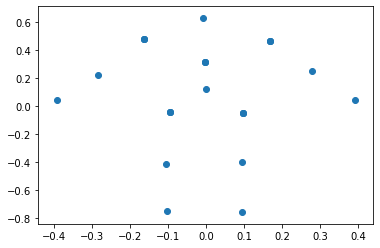

In [28]:
plt.scatter(df.x, df.y)

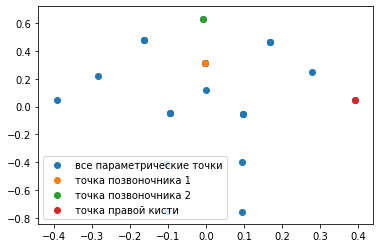

In [45]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка правой кисти'])

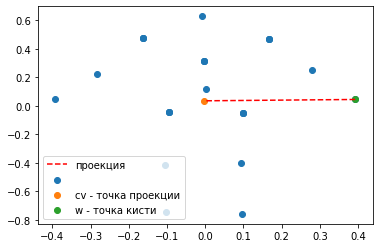

In [46]:
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
w = np.array([df.x[16],df.y[16]])
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'w - точка кисти'])

In [49]:
dist = linalg.norm(cv - w)

0.3945363610739645

In [48]:
print('Расстояние от кисти до позвоночника: ', dist)

Расстояние от кисти до позвоночника:  0.3945363610739645


## Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [50]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [51]:
from numpy import linalg as LA

e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [52]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]
Собственные значения:  [6. 3. 3.]
